In [ ]:
# Punto --> Limpieza variables Numericas! ✅

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv('df_superlimpiooo.csv')
df.sample(10)

,employeenumber,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,remotework
855,NaN,32,No,non travel,976.0,26,4,marketing,3,Male,100,3,2,sales executive,4,NaN,NaN,12069,0,No,18,3.0,1,0,4.0,2,3.0,3,2,2,NaN,1991,Yes
282,NaN,29,No,non travel,1496.0,1,1,technical degree,4,Male,41,3,2,manufacturing director,3,married,43190.0,26283,1,NaN,13,3.0,1,1,10.0,1,3.0,10,0,9,4319.0,1994,No
47,"158,0",43,No,NaN,394.0,26,2,NaN,3,Male,92,3,4,manager,4,married,169590.0,19494,1,Yes,12,3.0,4,2,25.0,3,4.0,25,4,12,16959.0,1980,Yes
1054,NaN,31,No,travel rarely,1398.0,8,2,NaN,4,Female,96,4,1,human resources,2,NaN,NaN,24609,9,No,18,NaN,4,0,8.0,3,3.0,3,0,2,NaN,1992,Yes
640,NaN,29,No,NaN,995.0,2,1,life sciences,1,Male,87,3,2,healthcare representative,4,NaN,88530.0,24483,1,NaN,19,3.0,4,1,6.0,0,4.0,6,1,3,8853.0,1994,Yes
65,"1024,0",48,No,travel rarely,1355.0,4,4,NaN,3,Male,78,2,3,healthcare representative,3,single,NaN,22245,7,NaN,14,NaN,2,0,27.0,3,3.0,15,4,8,NaN,1975,Yes
1111,NaN,24,No,travel rarely,506.0,29,1,medical,2,Male,91,3,1,laboratory technician,1,NaN,39070.0,3622,1,No,13,3.0,2,3,6.0,2,4.0,6,1,2,3907.0,1999,Yes
264,"5,0",33,No,travel frequently,1392.0,19,4,life sciences,19,Female,56,3,1,research scientist,3,married,29090.0,23159,1,NaN,11,3.0,3,0,NaN,3,3.0,8,3,0,2909.0,1990,Yes
620,"1280,0",46,No,NaN,168.0,4,2,NaN,4,Female,33,2,5,manager,2,married,187890.0,9946,2,NaN,14,3.0,3,1,NaN,2,3.0,11,0,8,18789.0,1977,Yes
393,"1182,0",35,No,travel rarely,819.0,2,3,NaN,3,Male,44,2,3,manufacturing director,2,divorced,NaN,19588,2,No,18,3.0,2,1,15.0,2,4.0,7,6,4,NaN,1988,Yes


In [3]:
df.shape

(1614, 33)

In [4]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['dailyrate', 'monthlyincome', 'performancerating', 'totalworkingyears',
       'worklifebalance', 'sameasmonthlyincome'],
      dtype='object')


In [5]:
#funcion para calcular el porcentaje de valores nulos en las variables categoricas
def calcular_porcentaje_nulos(df, columnas_categoricas):
    porcentaje_nulos = {}
    for columna in columnas_categoricas:
        # Calcular el número de valores nulos
        nulos = df[columna].isnull().sum()
        # Calcular el porcentaje de valores nulos
        porcentaje = (nulos / len(df)) * 100
        # Guardar el resultado en el diccionario
        porcentaje_nulos[columna] = porcentaje
    return porcentaje_nulos

In [6]:
# Lista de columnas categóricas
columnas_categoricas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome']

In [7]:
porcentajes_nulos = calcular_porcentaje_nulos(df, columnas_categoricas)

for columna, porcentaje in porcentajes_nulos.items():
    print(f"{columna}: {porcentaje:.2f}%")

dailyrate: 7.68%
worklifebalance: 6.69%
performancerating: 12.08%
totalworkingyears: 32.59%
monthlyincome: 52.23%


In [8]:
# Lista de columnas específicas de interés
columnas_especificas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome']

# Asegurarse de que las columnas existen en el DataFrame
columnas_especificas = [col for col in columnas_especificas if col in df.columns]

# Mostrar la mediana y la media para cada columna específica
for col in columnas_especificas:
    print(f"Mediana y Media para la columna {col.upper()}:")
    mediana = df[col].median()
    media = df[col].mean()
    print(f"Mediana: {mediana}")
    print(f"Media: {media}")
    print("........................")


Mediana y Media para la columna DAILYRATE:
Mediana: 798.0
Media: 802.0852348993288
........................
Mediana y Media para la columna WORKLIFEBALANCE:
Mediana: 3.0
Media: 2.759628154050465
........................
Mediana y Media para la columna PERFORMANCERATING:
Mediana: 3.0
Media: 3.150810429880197
........................
Mediana y Media para la columna TOTALWORKINGYEARS:
Mediana: 10.0
Media: 11.318933823529411
........................
Mediana y Media para la columna MONTHLYINCOME:
Mediana: 48590.0
Media: 64776.86121919585
........................


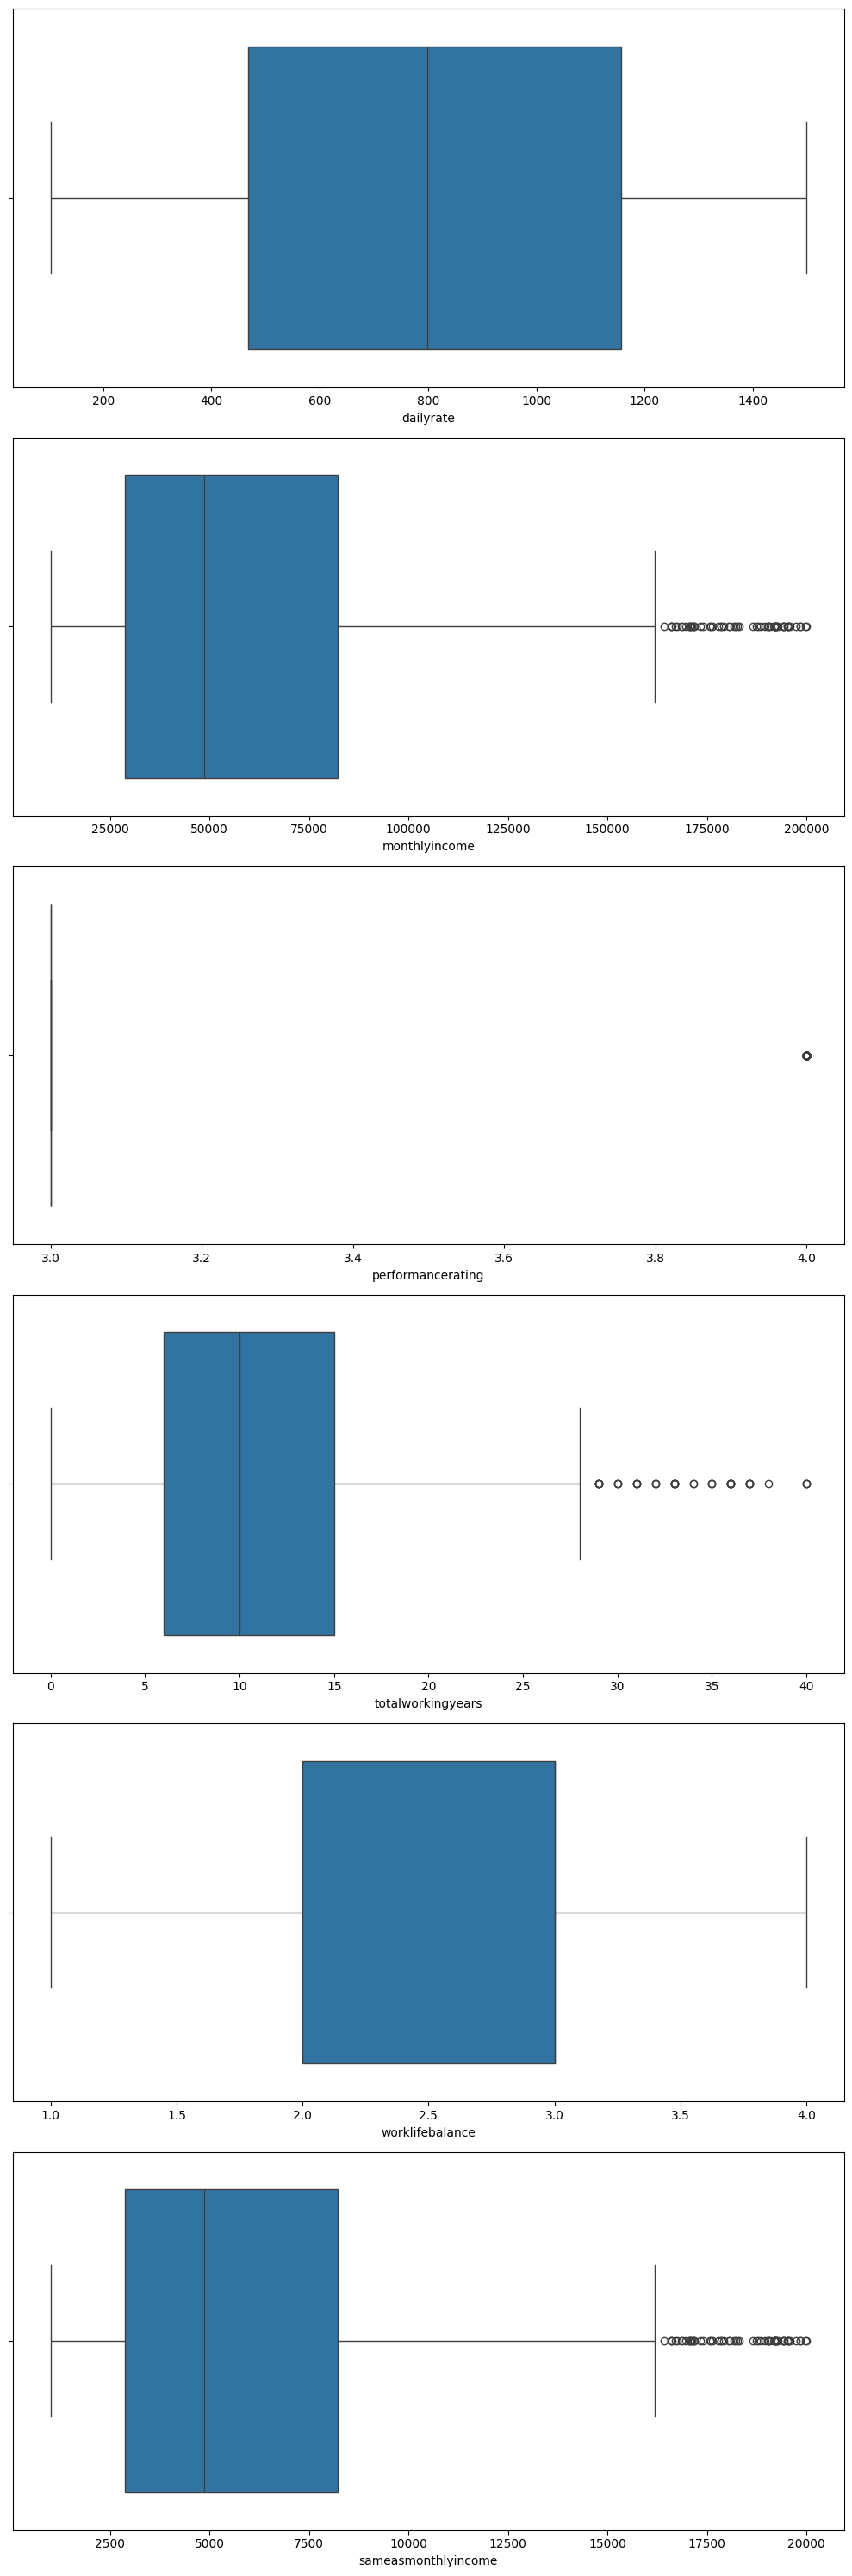

In [9]:
# Crear gráficos de caja para las columnas numéricas con valores nulos
fig, axes = plt.subplots(nrows=len(nulos_esta_num), ncols=1, figsize=(10, 5*len(nulos_esta_num)))
axes = axes.flatten()

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x=col, data=df, ax=axes[indice])

plt.tight_layout()
plt.show()


#### Reviso mis tres columnas

In [10]:
df['dailyrate'].isnull().sum()

124

In [11]:
df['dailyrate'].unique()

array([ 684.,  699.,  532.,  359., 1319.,  117., 1435.,  635., 1276.,
        840.,  247., 1369.,  201., 1360.,  692., 1398.,  286., 1402.,
        819.,  884., 1238.,  515., 1223.,  202.,  928.,  607.,  266.,
        429.,  589.,   nan, 1180., 1282.,  776.,  665.,  526., 1034.,
       1403., 1499.,  580.,  859.,  263., 1376.,  885., 1003., 1321.,
        394., 1372., 1333.,  228.,  737.,  823.,  667.,  301.,  573.,
       1329.,  630., 1063., 1017., 1296.,  939., 1355., 1448.,  200.,
       1202.,  404.,  208.,  813.,  465., 1189., 1001., 1394.,  161.,
        288.,  682., 1354.,  147.,  119., 1413.,  452.,  334., 1132.,
        982.,  480., 1099.,  672., 1379.,  583., 1492., 1050.,  469.,
        237., 1440., 1291., 1157., 1336., 1224.,  735., 1389.,  638.,
       1240.,  194., 1339.,  111., 1469.,  470., 1232., 1249.,  798.,
        549.,  570.,  541.,  164., 1117.,  619.,  319.,  956., 1245.,
       1397.,  527.,  213.,  882.,  330.,  406.,  217.,  481.,  669.,
       1465.,  685.,

------

In [12]:
df['performancerating'].isnull().sum()

195

In [13]:
df['performancerating'].unique()

array([ 3.,  4., nan])

In [14]:
df['performancerating'].value_counts()

performancerating
3.0    1205
4.0     214
Name: count, dtype: int64

------

In [15]:
df['worklifebalance'].isnull().sum()

108

In [16]:
df['worklifebalance'].unique()

array([ 3., nan,  2.,  4.,  1.])

In [17]:
df['worklifebalance'].value_counts()

worklifebalance
3.0    913
2.0    359
4.0    155
1.0     79
Name: count, dtype: int64

#### `Cambio los nulos por la media porque no tienen valores atipicos`

In [18]:
# Lista de columnas específicas de interés
columnas_3 = ['dailyrate', 'worklifebalance', 'performancerating']

# Asegurarse de que las columnas existen en el DataFrame
columnas_3 = [col for col in columnas_3 if col in df.columns]

# Calcular la media para cada columna específica y rellenar los valores nulos
for col in columnas_3:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

# Comprobar los nulos para cada columna específica
for col in columnas_3:
    print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")


Después del 'fillna' la columna DAILYRATE tiene 0 nulos
Después del 'fillna' la columna WORKLIFEBALANCE tiene 0 nulos
Después del 'fillna' la columna PERFORMANCERATING tiene 0 nulos


C:\Users\maria\AppData\Local\Temp\ipykernel_24072\4039544653.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


Columna totalworkingyears - Se concluye que los nulos se cambiarán por la Mediana ya que tenemos valores atípicos

In [19]:
df['totalworkingyears'].isnull().sum()

526

In [20]:
df['totalworkingyears'].value_counts()

totalworkingyears
10.0    144
8.0      86
6.0      84
9.0      69
5.0      66
7.0      56
4.0      54
1.0      53
12.0     34
3.0      32
14.0     30
13.0     30
11.0     29
15.0     28
16.0     28
20.0     28
18.0     27
21.0     23
17.0     22
2.0      21
22.0     18
19.0     17
24.0     14
23.0     13
28.0     13
26.0      8
0.0       8
29.0      6
36.0      6
25.0      6
33.0      6
37.0      5
27.0      5
31.0      4
30.0      3
32.0      3
35.0      3
40.0      3
34.0      2
38.0      1
Name: count, dtype: int64

In [21]:
df['totalworkingyears'].describe()

count    1088.000000
mean       11.318934
std         7.727675
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: totalworkingyears, dtype: float64

In [22]:
# Calcular la mediana de la columna 'totalworkingyears' y rellenar los valores nulos
mediana = df['totalworkingyears'].median()
df['totalworkingyears'].fillna(mediana, inplace=True)

# Comprobar los nulos para cada columna específica
print(f"Después del 'fillna' la columna 'totalworkingyears' tiene {df['totalworkingyears'].isnull().sum()} nulos")

C:\Users\maria\AppData\Local\Temp\ipykernel_24072\2626467184.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalworkingyears'].fillna(mediana, inplace=True)


Después del 'fillna' la columna 'totalworkingyears' tiene 0 nulos


Columna employeenumber 

In [23]:
df.columns

Index(['employeenumber', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth',
       'remotework'],
      dtype='object')

In [24]:
df['employeenumber'].isnull().sum()

431

In [25]:
df['employeenumber'].describe()

count      1183
unique     1079
top       482,0
freq          2
Name: employeenumber, dtype: object

Como employeenumber es una columna que nos puede indicar un valor unico para cada registro, asignaremos valores nuevos a los nulos

In [44]:
# Encontrar el valor máximo actual de 'employeenumber'
max_value = df['employeenumber'].max()

# Generar nuevos números únicos para los valores nulos
null_indices = df['employeenumber'].isnull()
df.loc[null_indices, 'employeenumber'] = range(int(max_value) + 1, int(max_value) + 1 + null_indices.sum())

# Convertir la columna 'employeenumber' a tipo int nuevamente, en caso de que se haya convertido a float
df['employeenumber'] = df['employeenumber'].astype(int)

# Verificar el resultado
print(df.head())

TypeError: '>=' not supported between instances of 'str' and 'float'

Columna monthlyincome- Se concluye que los nulos se cambiarán por la Mediana ya que tenemos valores atípicos // discutir, es un 52%

In [28]:
df['monthlyincome'].isnull().sum() / df.shape[0]

0.5223048327137546

In [29]:
df['monthlyincome'].describe()

count       771.000000
mean      64776.861219
std       47661.199589
min       10090.000000
25%       28800.000000
50%       48590.000000
75%       82305.000000
max      199990.000000
Name: monthlyincome, dtype: float64

In [ ]:
# Calcular la mediana de la columna 'totalworkingyears' y rellenar los valores nulos
mediana_monthly = df['monthlyincome'].median()
df['monthlyincome'].fillna(mediana_monthly, inplace = True)

# Comprobar los nulos para cada columna específica
print(f"Después del 'fillna' la columna 'monthlyincome' tiene {df['monthlyincome'].isnull().sum()} nulos")

Después del 'fillna' la columna 'monthlyincome' tiene 0 nulos


/tmp/ipykernel_851/3362264239.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthlyincome'].fillna(mediana_monthly, inplace = True)


In [ ]:
# Punto --> Limpieza variables Categoricas! ✅

In [27]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['employeenumber', 'businesstravel', 'educationfield', 'maritalstatus',
       'overtime'],
      dtype='object')


In [30]:
#funcion para calcular el porcentaje de valores nulos en las variables categoricas
def calcular_porcentaje_nulos(df, columnas_categoricas):
    porcentaje_nulos = {}
    for columna in columnas_categoricas:
        # Calcular el número de valores nulos
        nulos = df[columna].isnull().sum()
        # Calcular el porcentaje de valores nulos
        porcentaje = (nulos / len(df)) * 100
        # Guardar el resultado en el diccionario
        porcentaje_nulos[columna] = porcentaje
    return porcentaje_nulos

In [31]:
# Lista de columnas categóricas
columnas_categoricas = ['businesstravel', 'educationfield', 'maritalstatus', 'overtime']

In [32]:
porcentajes_nulos = calcular_porcentaje_nulos(df, columnas_categoricas)

for columna, porcentaje in porcentajes_nulos.items():
    print(f"{columna}: {porcentaje:.2f}%")

businesstravel: 47.83%
educationfield: 46.16%
maritalstatus: 40.33%
overtime: 41.88%


In [33]:
#Según los porcentajes de las categorías, si hay una categoría dominante reemplazamos por la moda, de lo contrario indicamos que pertenece a la categoría 'unknown'(desconocido)

# educationfield :categoría 'Desconocido' porque tiene casi 47% de nulos.

# maritalstatus categoría 'Desconocido' porque tiene un 40% de nulos. 

#overtime: categoría 'Desconocido' porque tiene un 40% de nulos. 

In [34]:
def reemplazar_nulos_por_moda(df, columnas_categoricas):
    for columna in columnas_categoricas:
        # Calcular la moda de la columna
        moda = df[columna].mode()[0]
        # Reemplazar los valores nulos por la moda
        df[columna] = df[columna].fillna(moda)
    return df

In [35]:
df = reemplazar_nulos_por_moda(df, columnas_categoricas)

In [36]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['employeenumber'], dtype='object')


In [37]:
df.head(5)

,employeenumber,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,remotework
0,"162,0",51,No,travel rarely,684.0,6,3,life sciences,1,Male,51,3,5,research director,3,married,195370.0,6462,7,No,13,3.0,3,0,10.0,5,3.000000,20,15,15,19537.0,1972,Yes
1,"259,0",52,No,travel rarely,699.0,1,4,life sciences,3,Male,65,2,5,manager,3,married,199990.0,5678,0,No,14,3.0,1,1,34.0,5,3.000000,33,11,9,19999.0,1971,Yes
2,"319,0",42,No,travel rarely,532.0,4,2,technical degree,3,Male,58,3,5,manager,4,married,192320.0,4933,1,No,11,3.0,4,0,22.0,3,2.759628,22,11,15,19232.0,1981,Yes
3,NaN,47,No,travel rarely,359.0,2,4,medical,1,Female,82,3,4,research director,3,married,171690.0,26703,3,No,19,3.0,2,2,10.0,2,2.759628,20,5,6,17169.0,1976,No
4,NaN,46,No,travel rarely,1319.0,3,3,technical degree,1,Female,45,4,4,sales executive,1,divorced,NaN,7739,2,No,12,3.0,4,1,10.0,5,3.000000,19,2,8,NaN,1977,No


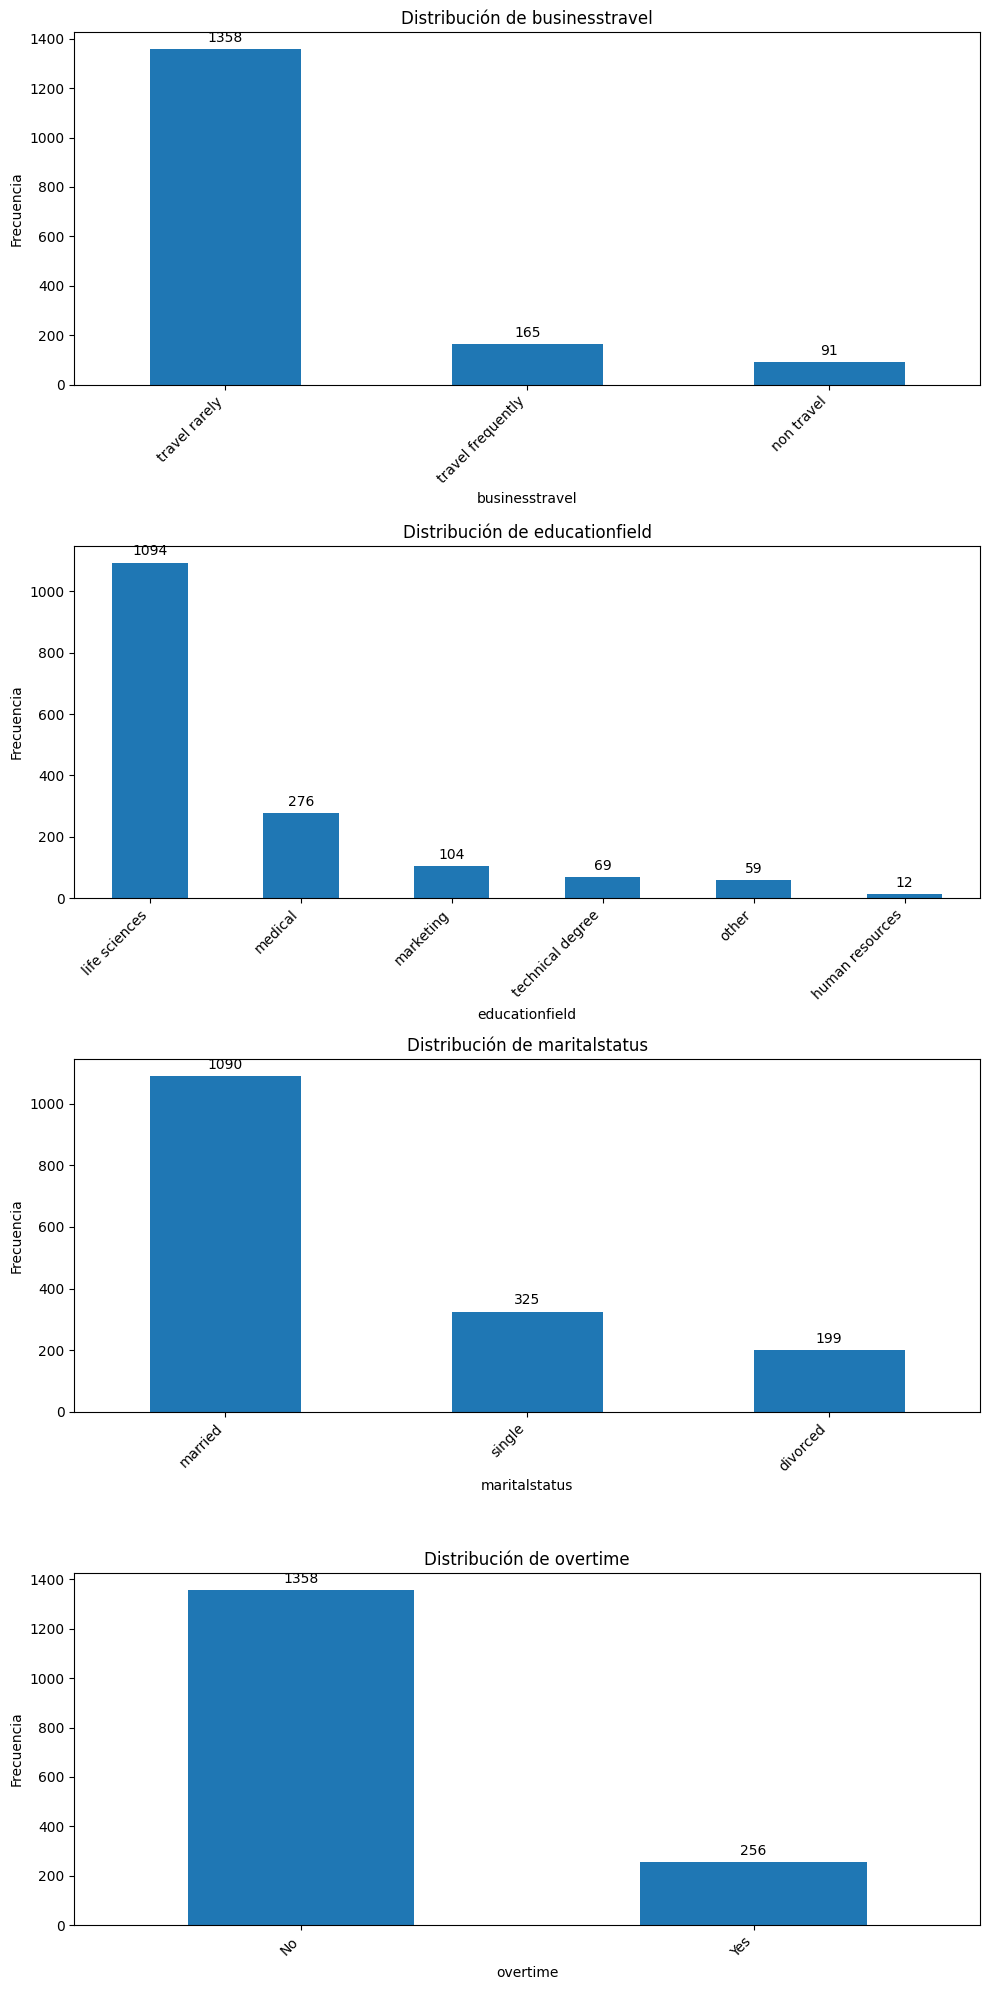

In [38]:
def graficar_variables_categoricas(df, columnas_categoricas):
    # Ajuste general para los gráficos
    fig, axes = plt.subplots(nrows=len(columnas_categoricas), ncols=1, figsize=(10, 5 * len(columnas_categoricas)))

    # Si solo hay una columna categórica, axes no será una lista, así que lo convertimos a lista
    if len(columnas_categoricas) == 1:
        axes = [axes]

    for ax, columna in zip(axes, columnas_categoricas):
        # Contar los valores
        conteo = df[columna].value_counts()
        # Crear gráfico de barras
        barras = conteo.plot(kind='bar', ax=ax)
        ax.set_title(f'Distribución de {columna}')
        ax.set_xlabel(columna)
        ax.set_ylabel('Frecuencia')
        ax.set_xticklabels(conteo.index, rotation=45, ha='right')

        # Añadir valores sobre las barras
        for barra in barras.patches:
            ax.annotate(f'{barra.get_height()}', 
                        xy=(barra.get_x() + barra.get_width() / 2, barra.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Lista de columnas categóricas
columnas_categoricas = ['businesstravel', 'educationfield', 'maritalstatus', 'overtime']

# Llamar a la función para crear los gráficos de barras
graficar_variables_categoricas(df, columnas_categoricas)


In [ ]:
# Guarda el DataFrame como un archivo CSV
df.to_csv("df_sin_nulos.csv", index = False)